In [1]:
import numpy as np
import pandas as pd

In [2]:

   df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
  

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3878,ham,She left it very vague. She just said she woul...,NaN,NaN,NaN
1674,ham,Nah dub but je still buff,NaN,NaN,NaN
1212,ham,"Yo, the game almost over? Want to go to walmar...",NaN,NaN,NaN
1326,ham,"Sorry, was in the bathroom, sup",NaN,NaN,NaN
1802,ham,Ok lor thanx... ÌÏ in school?,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [151]:
# drop last 3 coloumns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [152]:
df.sample(5)

,v1,v2
1520,spam,"URGENT! Your Mobile No was awarded a å£2,000 B..."
53,ham,Wow. I never realized that you were so embaras...
1073,ham,Lul im gettin some juicy gossip at the hospita...
1535,spam,You have won a Nokia 7250i. This is what you g...
2621,ham,Lol! Nah wasn't too bad thanks. Its good to b ...


In [153]:
# Renaming the cols
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text
3510,ham,I'm serious. You are in the money base
234,spam,Text & meet someone sexy today. U can find a d...
2042,ham,"Me not waking up until 4 in the afternoon, sup"
3453,ham,I dont have any of your file in my bag..i was ...
1912,ham,For real tho this sucks. I can't even cook my ...


In [154]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [155]:
df['Target'] = encoder.fit_transform(df['Target'])

In [156]:
df.head()


,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [157]:
# Missing Values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [158]:
# Check for Duplicate values
df.duplicated().sum()

np.int64(403)

In [159]:
# Remove Duplicates 
df = df.drop_duplicates(keep='first')

In [160]:
df.duplicated().sum()

np.int64(0)

In [161]:
df.shape

(5169, 2)

## 2. EDA
   

In [162]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [163]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

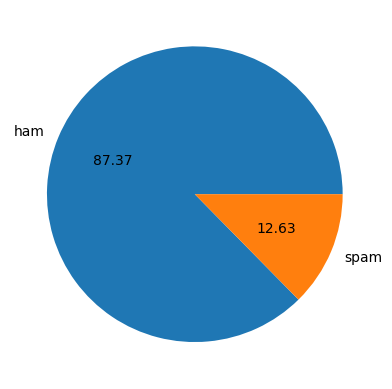

In [164]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=('ham','spam'),autopct="%0.2f")
plt.show()

In [165]:
# Data is imbalanced

In [166]:
import nltk

In [167]:
!pip install nltk


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [168]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [169]:
df['num_characters'] = df['Text'].apply(len)

In [170]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [171]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [172]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [173]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [174]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [175]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [176]:
# For HAM

In [177]:
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [178]:
#For SPAM

In [179]:
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [180]:
import seaborn as sns

In [181]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='num_characters', ylabel='Count'>

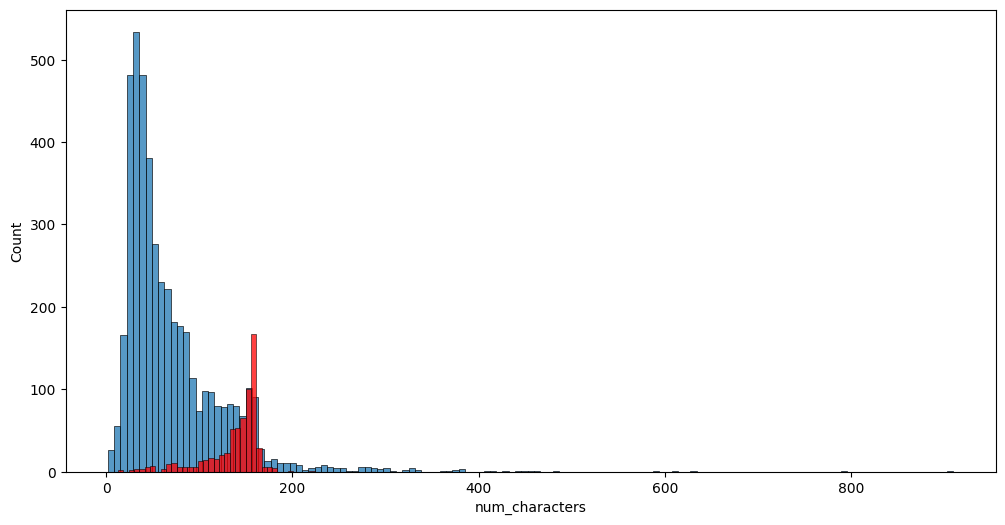

In [182]:
# Histogram for Characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

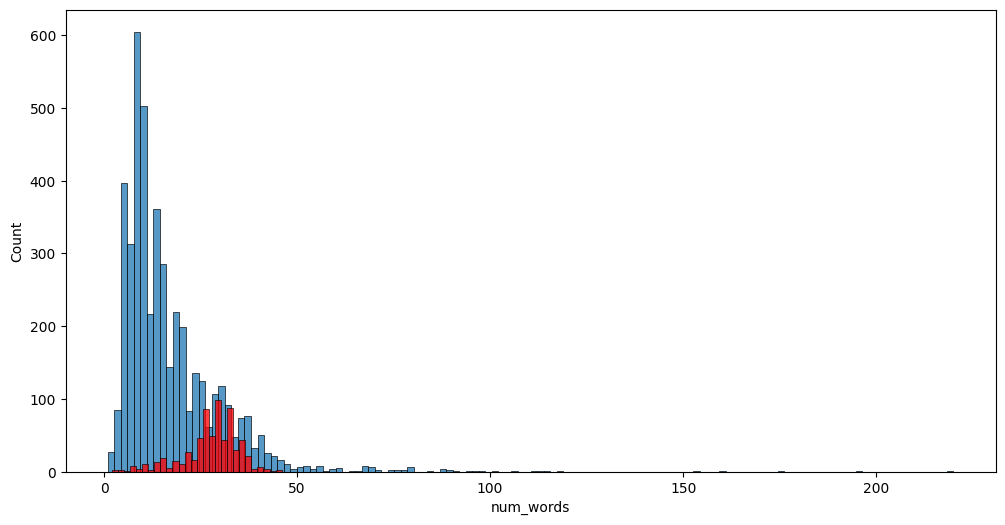

In [183]:
#Histogram for Words
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

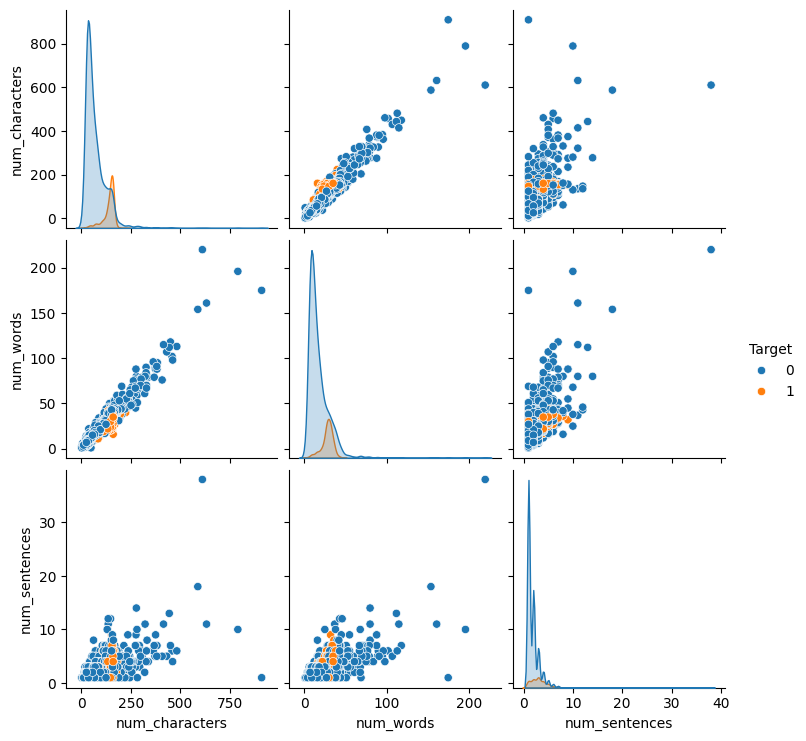

In [184]:
sns.pairplot(df,hue='Target')

In [185]:
 # sns.heatmap(df.corr(),annot=True) This is not working

## 3. Data Pre-Processing
* Lower Case
* Tokenization
* Removing Special Characters
* Removing Stop Words And Punctuations

In [186]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
        
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [187]:
transform_text("i loved the YT lectures in Machine Learning. How about you ?")

'love yt lectur machin learn'

In [188]:
df["Text"][0]  # Text not visible

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [189]:
# Stop Words
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [190]:
# Punctuation Marks
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [191]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [192]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [193]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [194]:
!pip install --upgrade pip

  Using cached pip-24.1.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.1.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\dell\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [195]:
!pip install wordcloud


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [196]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

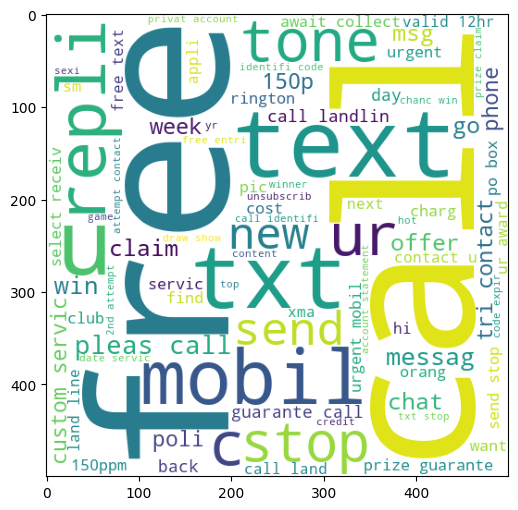

In [197]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [198]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

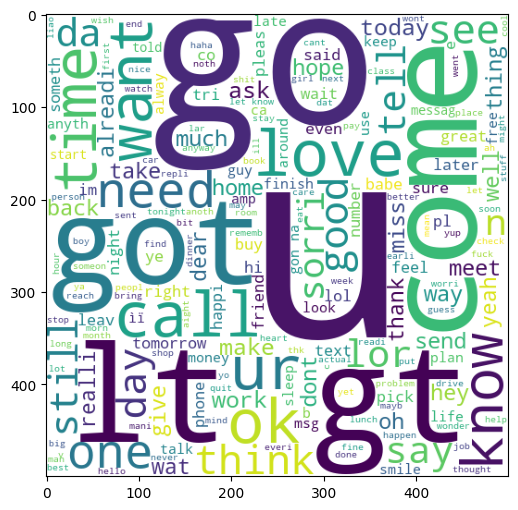

In [199]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [200]:
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [201]:
len(spam_corpus)

9939

In [202]:
# Create a DataFrame from the Counter object
spam_counter = Counter(spam_corpus)
spam_df = pd.DataFrame(spam_counter.most_common(30), columns=['word', 'count'])

# Create the bar plot
sns.barplot(data=spam_df, x='word', y='count')
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'Counter' is not defined

In [ ]:
ham_corpus = []
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

In [ ]:
# Create a DataFrame from the Counter object
ham_counter = Counter(ham_corpus)
ham_df = pd.DataFrame(ham_counter.most_common(30), columns=['word', 'count'])

# Create the bar plot
sns.barplot(data=ham_df, x='word', y='count')
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [219]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [220]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [221]:
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [222]:
X.shape

(5169, 3000)

In [223]:
y = df['Target'].values

In [224]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [225]:
from sklearn.model_selection import train_test_split

In [227]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [228]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [229]:
gnb = GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [230]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [231]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [232]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [233]:
#ydidf->mnb

In [234]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [235]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [236]:
svc= SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [237]:
clfs={
      'SVC': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [250]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [252]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, np.float64(0.9747899159663865))

In [258]:
accuracy_scores =[]
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  Logistic Regression
Accuracy -  0.9545454545454546
Precision -  0.9789473684210527
For  Random Forest
Accuracy -  0.9738878143133463
Precision -  0.9743589743589743
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739


C:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9690522243713733
Precision -  0.9732142857142857
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9396551724137931


In [259]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [266]:
print(performance_df)

              Algorithm  Accuracy  Precision
4                    NB  0.970986   1.000000
3                    KN  0.905222   1.000000
7                    RF  0.973888   0.982609
1   Logistic Regression  0.954545   0.978947
0                   SVC  0.975822   0.974790
10                  ETC  0.974855   0.974576
2         Random Forest  0.973888   0.974359
8              AdaBoost  0.969052   0.973214
6                    LR  0.955513   0.960000
12                  xgb  0.965184   0.939655
11                 GBDT  0.950677   0.930693
9                   BgC  0.958414   0.868217
5                    DT  0.932302   0.833333


In [267]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

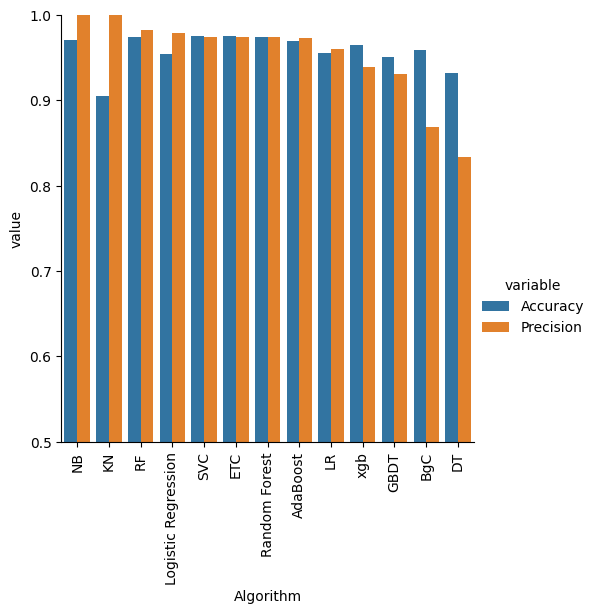

In [269]:
sns.catplot(x = 'Algorithm', y= 'value',hue = 'variable', data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# 5. Model Improvement

In [270]:
#model improve
#1. change the max features parameter of TfIdf

In [271]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft-3000':precision_scores})

In [272]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft-3000
0,NB,0.970986,1.000000,0.970986,1.000000
1,KN,0.905222,1.000000,0.905222,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609
3,Logistic Regression,0.954545,0.978947,0.954545,0.978947
4,SVC,0.975822,0.974790,0.975822,0.974790
5,ETC,0.974855,0.974576,0.974855,0.974576
6,Random Forest,0.973888,0.974359,0.973888,0.974359
7,AdaBoost,0.969052,0.973214,0.969052,0.973214
8,LR,0.955513,0.960000,0.955513,0.960000
9,xgb,0.965184,0.939655,0.965184,0.939655


In [274]:
import pickle 
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))